In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

mse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

dummy_data = np.array([[8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23]])
dummy_data = scaler.transform(dummy_data)
predicted_price = model.predict(dummy_data)[0][0]

print(f"Predicted Median House Price: ${predicted_price * 100000:.2f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.7439 - mae: 0.9375 - val_loss: 0.4856 - val_mae: 0.4799
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4282 - mae: 0.4672 - val_loss: 0.4358 - val_mae: 0.4583
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4097 - mae: 0.4384 - val_loss: 0.3977 - val_mae: 0.4486
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3505 - mae: 0.4236 - val_loss: 0.3848 - val_mae: 0.4326
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3566 - mae: 0.4214 - val_loss: 0.3713 - val_mae: 0.4223
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3403 - mae: 0.4102 - val_loss: 0.3658 - val_mae: 0.4434
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3347 - mae: 0.4105 - val_loss: 0.3683 - val_mae: 0.4119
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3289 - mae: 0.3991 - val_loss: 0.3484 - val_mae: 0.4183
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3102 

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes in Iris dataset
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

dummy_flower = np.array([[5.1, 3.5, 1.4, 0.2]])
dummy_flower = scaler.transform(dummy_flower)

prediction = model.predict(dummy_flower)
predicted_class = np.argmax(prediction)

print(f"Predicted Class: {iris.target_names[predicted_class]}")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5346 - loss: 1.0923 - val_accuracy: 0.4167 - val_loss: 1.1856
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5678 - loss: 1.0673 - val_accuracy: 0.2917 - val_loss: 1.0861
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5159 - loss: 0.9670 - val_accuracy: 0.2917 - val_loss: 1.0028
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4402 - loss: 0.9348 - val_accuracy: 0.5000 - val_loss: 0.9289
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5737 - loss: 0.8746 - val_accuracy: 0.6667 - val_loss: 0.8671
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6386 - loss: 0.8248 - val_accuracy: 0.6667 - val_loss: 0.8070
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7510 - loss: 0.6972 - val_accuracy: 0.6667 - val_loss: 0.7570
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6074 - loss: 0.7421 - val_accuracy: 0.6667 - val_loss: 0.7178
E

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8597 - loss: 0.4875 - val_accuracy: 0.9588 - val_loss: 0.1397
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9626 - loss: 0.1223 - val_accuracy: 0.9670 - val_loss: 0.1117
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9743 - loss: 0.0809 - val_accuracy: 0.9729 - val_loss: 0.0969
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9825 - loss: 0.0565 - val_accuracy: 0.9747 - val_loss: 0.0911
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9865 - loss: 0.0420 - val_accuracy: 0.9758 - val_loss: 0.0931
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9900 - loss: 0.0327 - val_accuracy: 0.9735 - val_loss: 0.0970
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0250 - val_accuracy: 0.9745 - val_loss: 0.0979
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9924 - loss: 0.0221 -

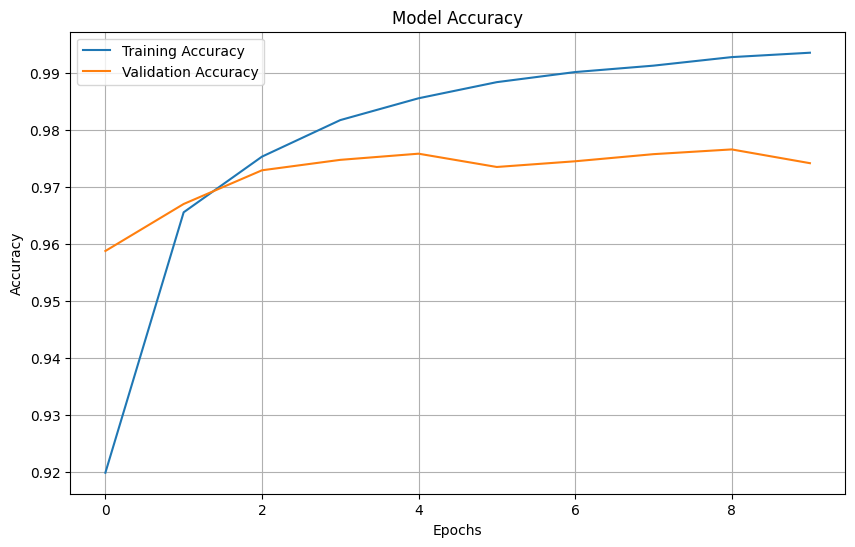

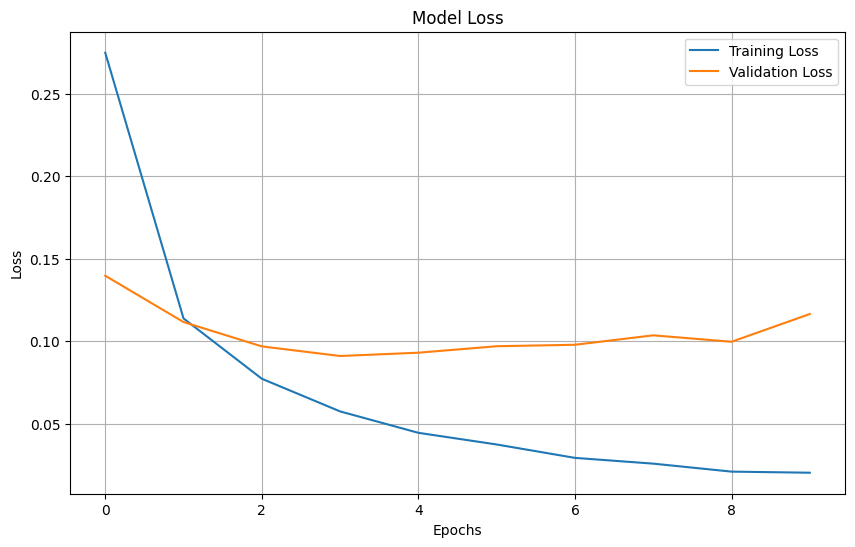

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


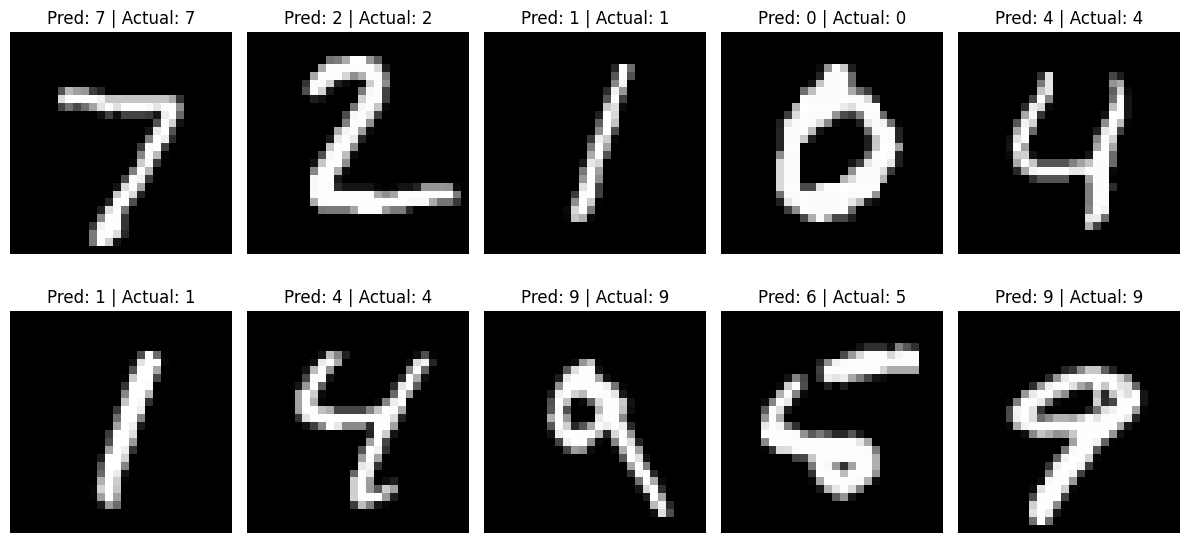

In [1]:
# MNIST DATASET CLASSIFICATION
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Predict on test data and visualize some predictions
import numpy as np
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

# Visualize first 10 test samples
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]} | Actual: {actual[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()